## Use multiple Scopus Author IDs to retrieve lists of articles by author

In [ ]:
#pip install config

In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import re
import io
from config import api_key
from collections import OrderedDict
from pandas.io.json import json_normalize  

In [2]:
# Run a test search to determine the total results from the Get Request for the Specified Date Range
url = "http://api.elsevier.com/content/search/scopus?" + "?format=json"
date = "2005-2021"
headers = {"X-ELS-APIKey": api_key, 'Accept':'application/json'}
view = "Complete"
parameters = {"query": 'nanosafety', "view": view, "date": date, "count": 25}
article_response = requests.get(url, headers=headers, params=parameters)
article_response_json = article_response.json()
Total_Results = int(article_response_json['search-results']['opensearch:totalResults'])
Total_Results

5123

In [3]:
parameters = {"query": 'nanosafety', "view": view, "date": date}
nanosafety_appended_df = pd.DataFrame()
for n in range(0, 4999, 25):
    parameters = {"query": 'nanosafety', "view": view, "date": date, "count": 25, "start": n}
    article_response = requests.get(url, headers=headers, params=parameters)
    article_response_json = article_response.json()
    scopus_articles_df = pd.DataFrame.from_dict(json_normalize(article_response_json, meta=["search-results"], record_path=["search-results", "entry"]), orient="columns")
    date_title_description_df = scopus_articles_df[["prism:coverDate", "dc:title", "dc:description"]]
    date_title_description_df.columns = ['Date','Title','Content']
    nanosafety_appended_df = nanosafety_appended_df.append(date_title_description_df)
    

In [4]:
nanosafety_appended_df

Date                                              Title  \
0   2021-12-01  Ecotoxicological read-across models for predic...   
1   2021-12-01  An inverted in vitro triple culture model of t...   
2   2021-12-01  Understanding the impact of more realistic low...   
3   2021-12-01  Understanding the fate of nano-plastics in was...   
4   2021-12-01  Mapping and distribution of speciation changes...   
5   2021-12-01  Radial extracorporeal shock wave responsive pr...   
6   2021-12-01  A core-shell structured COVID-19 mRNA vaccine ...   
7   2021-12-01  Label-free detection of uptake, accumulation, ...   
8   2021-12-01  Biotransformation of rare earth oxide nanopart...   
9   2021-12-01  Bioengineered bacteria-derived outer membrane ...   
10  2021-12-01  Manually curated transcriptomics data collecti...   
11  2021-12-01  The combined effect of food additive titanium ...   
12  2021-12-01  MSN, MWCNT and ZnO nanoparticle-induced CHO-K1...   
13  2021-12-01  Integrating gold nanoclusters, folic acid and ...   
14  2021-12-01  Carbon nano-onion-mediated dual targeting of P...   
15  2021-11-05  Novel ratiometric probe based on the use of ra...   
16  2021-11-01  Speciation, transportation, and pathways of ca...   
17  2021-11-01  A critical analysis of environmental sustainab...   
18  2021-11-01  Electrostatic attraction of cationic pollutant...   
19  2021-11-01  A highly efficient adsorbent constructed by th...   
20  2021-11-01  Biofabrication of natural hydrogels for cardia...   
21  2021-10-15  In situ nanoremediation of soils and groundwat...   
22  2021-10-01  Second near-infrared photoactivatable hydrogen...   
23  2021-10-01  CD151 enrichment in exosomes of luminal androg...   
24  2021-10-01  Impact of macroporous silica nanoparticles at ...   
0   2021-10-01  Chitosan grafted butein: A metal-free transduc...   
1   2021-10-01  Disassembly and reassembly of diphenylalanine ...   
2   2021-10-01  Caco-2 in vitro model of human gastrointestina...   
3   2021-10-01  Structure transformable nanoparticles for phot...   
4   2021-09-20  Do nanoparticles cause hormesis? Early physiol...   
..         ...                                                ...   
20  2010-09-01  AIDS treatment with novel anti-HIV compounds i...   
21  2010-08-01  Both Nramp1 and DMT1 are necessary for efficie...   
22  2010-07-06  Lung deposition and extrapulmonary translocati...   
23  2010-07-01  Specific hemosiderin deposition in spleen indu...   
24  2010-07-01  Studies on anti-tumor and antimetastatic activ...   
0   2010-06-18  Interchain coupling induced localization/deloc...   
1   2010-06-16  A stretching device for imaging real-time mole...   
2   2010-06-15  Using ion-pair reversed-phase HPLC ICP-MS to s...   
3   2010-06-01  Toxicity of zinc oxide nanoparticles to zebraf...   
4   2010-05-25  Potent angiogenesis inhibition by the particul...   
5   2010-05-19  The big red shift of photoluminescence of Mn d...   
6   2010-05-15                          Microfluidic western blot   
7   2010-05-06  First endohedral metallofullerene-containing p...   
8   2010-05-01  Effects of ZnO nanoparticles on antioxidant en...   
9   2010-05-01  Structures and electronic properties of M@Au<i...   
10  2010-04-20  Metallofullerene nanoparticles circumvent tumo...   
11  2010-04-12  Enhanced exciton migration in electrospun poly...   
12  2010-04-01  Loop-mediated isothermal amplification integra...   
13  2010-03-24  Chemistry of carbon nanotubes in biomedical ap...   
14  2010-03-12  Applications and toxicological issues surround...   
15  2010-03-08  Physico-chemical behaviour and algal toxicity ...   
16  2010-03-05  Size-dependent mechanical properties of PVA na...   
17  2010-03-01  Preparation of anatase-type TiO<inf>2</inf> na...   
18  2010-03-01  Therapeutic strategies underpinning the develo...   
19  2010-02-23  [Gd@C<inf>82</inf>(OH)<inf>22</inf>]<inf>n</in...   
20  2010-02-01  Polycationic nanoparticles as nonviral vectors...   
21  2010

In [5]:
nanosafety_appended_df.to_csv('Nanosafety.csv',  index = True)

In [8]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
lemmatizer = WordNetLemmatizer()

In [41]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [50]:
for row in nanosafety_appended_df['Title']:
    big_string_title = ' '.join(nanosafety_appended_df['Title'])
    
big_string_title

'Ecotoxicological read-across models for predicting acute toxicity of freshly dispersed versus medium-aged NMs to Daphnia magna An inverted in vitro triple culture model of the healthy and inflamed intestine: Adverse effects of polyethylene particles Understanding the impact of more realistic low-dose, prolonged engineered nanomaterial exposure on genotoxicity using 3D models of the human liver Understanding the fate of nano-plastics in wastewater treatment plants and their removal using membrane processes Mapping and distribution of speciation changes of metals from nanoparticles in environmental matrices using synchrotron radiation techniques Radial extracorporeal shock wave responsive precise nanoplatform for effective osteoporosis sequential treatment A core-shell structured COVID-19 mRNA vaccine with favorable biodistribution pattern and promising immunity Label-free detection of uptake, accumulation, and translocation of diesel exhaust particles in ex vivo perfused human placenta

In [52]:
input_text_title = process_text(big_string_title)

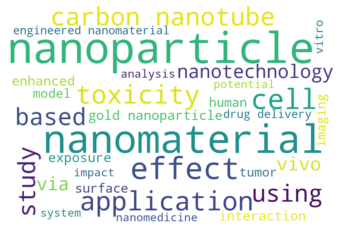

In [136]:
wc_title = WordCloud(width=1200, height=800, max_words=30, background_color="white").generate(input_text_title)
plt.figure()
plt.imshow(wc_title, interpolation='bilinear')
plt.axis("off")
plt.show()

In [137]:
image_title = wc_title.to_image()
image_title.show()

In [72]:
for row in nanosafety_appended_df:
    big_string_content = str(nanosafety_appended_df['Content'].to_list())
    
big_string_content

'["Nanoinformatics models to predict the toxicity/ecotoxicity of nanomaterials (NMs) are urgently needed to support commercialization of nanotechnologies and allow grouping of NMs based on their physico-chemical and/or (eco)toxicological properties, to facilitate read-across of knowledge from data-rich NMs to data-poor ones. Here we present the first ecotoxicological read-across models for predicting NMs ecotoxicity, which were developed in accordance with ECHA\'s recommended strategy for grouping of NMs as a means to explore in silico the effects of a panel of freshly dispersed versus environmentally aged (in various media) Ag and TiO2 NMs on the freshwater zooplankton Daphnia magna, a keystone species used in regulatory testing. The dataset used to develop the models consisted of dose-response data from 11 NMs (5 TiO2 NMs of identical cores with different coatings, and 6 Ag NMs with different capping agents/coatings) each dispersed in three different media (a high hardness medium (HH

In [73]:
input_text_content = process_text(big_string_content)

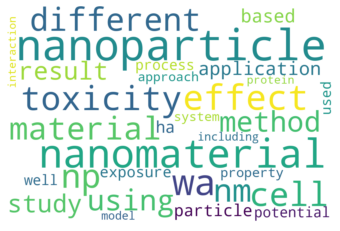

In [134]:
wc_content = WordCloud(width=1200, height=800, background_color="white", max_words=30).generate(input_text_content)
plt.figure()
plt.imshow(wc_content, interpolation='bilinear')
plt.axis("off")
plt.show()

In [135]:
image_content = wc_content.to_image()
image_content.show()

In [151]:
data = pd.DataFrame(nanosafety_appended_df.groupby("Date").size())
data = data.reset_index()
data.columns = ['Date', 'Count']
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True).apply(lambda x: x.strftime('%Y-%m'))
data_month = pd.DataFrame(data.groupby("Date").size())
data_month = data_month.reset_index()
data_month.columns = ['Date', 'Count']
#data_month.plot(x ='Date', y='Count', kind = 'bar')
data_month

Date  Count
0    2010-01      4
1    2010-02      2
2    2010-03      5
3    2010-04      3
4    2010-05      5
5    2010-06      4
6    2010-07      2
7    2010-08      1
8    2010-09      7
9    2010-10      2
10   2010-11      3
11   2010-12      5
12   2011-01      3
13   2011-02      3
14   2011-03      2
15   2011-04      6
16   2011-05      4
17   2011-06      5
18   2011-07      5
19   2011-08      4
20   2011-09      4
21   2011-10      4
22   2011-11     10
23   2011-12      2
24   2012-01      5
25   2012-02      6
26   2012-03      7
27   2012-04     10
28   2012-05      8
29   2012-06      6
..       ...    ...
114  2019-07     13
115  2019-08      6
116  2019-09     13
117  2019-10     12
118  2019-11     11
119  2019-12     12
120  2020-01     12
121  2020-02     15
122  2020-03     16
123  2020-04     12
124  2020-05     14
125  2020-06     14
126  2020-07      6
127  2020-08     14
128  2020-09     16
129  2020-10      8
130  2020-11     17
131  2020-12      9
132  2021-01     15
133  2021-02     10
134  2021-03     14
135  2021-04     14
136  2021-05     14
137  2021-06     13
138  2021-07      6
139  2021-08      4
140  2021-09      4
141  2021-10      2
142  2021-11      2
143  2021-12      1

[144 rows x 2 columns]